# Air Quality Prediction Analysis of Kathmandu City : Impact of Environmental  Factors in the Suspended Particulate Matters

Author: Ganesh Sapkota 
Date: 01/19/2021

#### Problem: Air Pollution in Kathmandu City
Kathmandu, the capital city of Nepal is one of the fastest growing cities in south Asia which is situated within a valley and many mountain ranges around.  Due to rapid growth in construction related activities, vehicles and industries, air pollution has been a quite prominent problem in this city. In 2019, Kathmandu was ranked as seventh most polluted capital city of the world in terms of Air quality index (AQI), according to research by IQ Air Visual, a Swiss-based group that gathers air-quality data globally. As of 4th January 2021, Kathmandu recorded highest AQI index of 450
The key factors of air pollution in Kathmandu might be emissions from old and outdated vehicles relying diesel fuels, open burn fires of organic garbage, dust and finely ground particles from construction sites compounded by its geographical location, lacking the elevation and wind to allow these pollutants to disperse properly, instead accumulating and rising to dangerous levels.

#### Major Pollutants 
Major source of pollutant came from burning and combustion, in the form of fine particulate matter (PM) of black carbon. Particulate matter PMx are categorized based on its diameter x. The most considerable PMx are PM2.5 and PM10. PM2.5 indicates fine particles with the diameter less than or equal to 2.5 micrometer while PM10 refers to coarse dust particle having diameter 2.5 to 10 micrometer. In 2019 Kathmandu recorded PM2.5 reading of 48 μg/m³ as a yearly average, placing it into the ‘unhealthy for sensitive groups’ bracket, that requires a PM2.5 reading of anywhere between 35.5 to 55.4 μg/m³.
Other pollutants arising from vehicles would include carbon monoxide (CO), nitrogen dioxide (NO2), ozone (O3) and sulfur dioxide (SO2).

#### Effect of Environmental Factors in PM10 Level

The weather factors play an important role in the transport, diffusion and distributions of air pollution. The entering of pollutants from the ground surface, their residence in the atmosphere, and the formation of secondary pollutants only depends not on the only rate of emission of the reactants into the air from the source, but might also on wind speed, direction of wind, weather temperature, relative humidity. Thus, it is often important to understand their behavior leading to an observed concentration of pollutants at a given point.

Following piece of work is done with an intention to perform statistical analysis on Suspended Paticulate Matters and different environmental factors in kathmandu city and to develop an insight by observing their separate relationships with each other.
This exercise has been organized as: A) Data Pre-Processing and B) Statistical Analysis



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# A. Data Pre-processing
### 1. Reading Dataset and displaying the columns:
    The datasets were optained from opendatanepal and Nepal Government's Department of Environment and merged together to       get Pollution_data_11_station_merge.csv

In [2]:
df = pd.read_csv('Pollution_data_11_station_merge.csv', parse_dates=['datetime'], engine = 'python');
df.head()

,Unnamed: 0,T_x,datetime,station_name,PM1_I,PM10_I,PM2.5_I,RH_I,WS_I,WD_I,TSP_I,long,latt
0,0,15.9,2020-10-26 00:01:00+00:00,Nepalgunj,23.100000,23.400000,23.400000,92.900002,0.7,302.799988,23.400000,81.6222,28.05275
1,1,15.9,2020-10-26 00:02:00+00:00,Nepalgunj,22.299999,22.299999,22.299999,92.900002,0.5,278.100006,22.299999,81.6222,28.05275
2,2,15.9,2020-10-26 00:03:00+00:00,Nepalgunj,21.900000,21.900000,21.900000,93.099998,0.5,290.100006,21.900000,81.6222,28.05275
3,3,15.8,2020-10-26 00:04:00+00:00,Nepalgunj,21.600000,22.000000,21.900000,93.199997,0.3,299.000000,22.000000,81.6222,28.05275
4,4,15.8,2020-10-26 00:05:00+00:00,Nepalgunj,22.200001,22.200001,22.200001,93.300003,0.4,323.200012,22.200001,81.6222,28.05275


In [3]:
df.shape

(158502, 13)

### 2. Filtering the data points that corrosponds to Kathmandu only 
    Station Name 'Ratnapark' Indicates the data from Kathmandu

In [4]:
is_rp =  df[df['station_name']== 'Ratnapark']      #rp means 'Ratnapark'
is_rp.tail()

,Unnamed: 0,T_x,datetime,station_name,PM1_I,PM10_I,PM2.5_I,RH_I,WS_I,WD_I,TSP_I,long,latt
33047,33047,21.799999,2020-11-06 08:52:00+00:00,Ratnapark,11.3,26.5,15.0,53.5,1.0,176.600006,26.5,85.31,27.7
33048,33048,21.799999,2020-11-06 08:53:00+00:00,Ratnapark,13.0,102.5,17.2,53.5,2.3,321.700000,220.8,85.31,27.7
33049,33049,21.400000,2020-11-06 09:11:02+00:00,Ratnapark,12.6,12.9,12.9,55.1,0.5,303.600000,12.9,85.31,27.7
33050,33050,21.200000,2020-11-06 09:22:00+00:00,Ratnapark,13.3,44.5,27.3,57.1,1.5,291.900000,44.5,85.31,27.7
33051,33051,21.100000,2020-11-06 09:32:00+00:00,Ratnapark,12.9,21.6,14.4,57.0,1.0,304.200000,21.6,85.31,27.7


### 3. Dropping columns that are irrelevant to our desired analysis

In [5]:

is_rp1 = is_rp.drop(['Unnamed: 0','PM1_I','station_name','long','latt'], axis = 1) 
is_rp1.head()

,T_x,datetime,PM10_I,PM2.5_I,RH_I,WS_I,WD_I,TSP_I
16383,16.200001,2020-10-26 00:00:06+00:00,13.800000,11.0,91.599998,0.0,0.0,13.800000
16384,16.200001,2020-10-26 00:01:00+00:00,8.400000,8.4,91.500000,0.0,0.0,8.400000
16385,16.200001,2020-10-26 00:02:00+00:00,19.299999,12.9,91.599998,0.0,0.0,24.299999
16386,16.299999,2020-10-26 00:03:00+00:00,8.400000,8.2,91.500000,0.0,0.0,8.400000
16387,16.400000,2020-10-26 00:04:00+00:00,10.900000,8.8,91.500000,0.0,0.0,10.900000


### 4. Check Null/ NaN Values and Remove If Exist

In [6]:
is_rp1.isnull().sum()

T_x           0
datetime      0
PM10_I       84
PM2.5_I      84
RH_I        208
WS_I        254
WD_I        254
TSP_I        83
dtype: int64

In [7]:
is_rp1.shape

(16669, 8)

In [8]:
#Pick non-zero values which turns all zero values into NaN
is_rp2 = is_rp1[is_rp != 0] 
is_rp2['datetime'] = pd.to_datetime(is_rp2['datetime'])

In [9]:
is_rp2 = is_rp2.dropna()   #drop all rows with value NaN
is_rp2.head()

,T_x,datetime,PM10_I,PM2.5_I,RH_I,WS_I,WD_I,TSP_I
16393,16.4,2020-10-26 00:10:00+00:00,11.2,7.5,91.400002,0.4,160.100006,22.500000
16394,16.4,2020-10-26 00:10:14+00:00,14.4,9.6,91.400002,0.4,164.100006,14.500000
16400,16.5,2020-10-26 00:16:00+00:00,13.7,9.1,90.900002,0.6,156.100006,19.799999
16403,16.5,2020-10-26 00:19:00+00:00,8.8,8.5,90.800003,0.4,196.300003,8.800000
16404,16.5,2020-10-26 00:20:00+00:00,8.1,7.2,90.800003,0.3,201.899994,8.100000


In [10]:
is_rp2 = is_rp2.set_index('datetime')

In [11]:
is_rp2.index = pd.to_datetime(is_rp2.index)

In [12]:
is_rp2 = is_rp2.resample('H').mean()         #resampling data to 'Hourly' granularity
is_rp2.index = pd.to_datetime(is_rp2.index)
is_rp2.head()

,T_x,PM10_I,PM2.5_I,RH_I,WS_I,WD_I,TSP_I
datetime,,,,,,,
2020-10-26 00:00:00+00:00,16.500000,11.066667,8.857576,90.896971,0.400000,182.381818,13.684848
2020-10-26 01:00:00+00:00,17.077419,15.738710,11.758064,89.020968,0.670968,176.798387,19.333871
2020-10-26 02:00:00+00:00,18.963158,57.133332,21.519298,82.547368,0.792982,175.903509,113.636843
2020-10-26 03:00:00+00:00,21.137288,54.981356,13.228814,74.181356,0.906780,197.257627,108.900000
2020-10-26 04:00:00+00:00,22.665116,47.718604,12.355814,66.858140,0.976744,195.265118,101.720929


In [13]:
rename_cols = is_rp2.columns = ['Temp','PM10_I','PM2.5_I','Rel_Humid','Wind_speed','Wind_dir','tot_sus_particle']
new_cols = ['Temp','PM10_I','PM2.5_I','Rel_Humid','Wind_speed','Wind_dir','tot_sus_particle']
# is_rp2.head()

In [14]:
# is_rp2.dtypes

In [15]:
is_rp2.shape
# is_rp2.to_csv('final_dataset_pollution.csv')

(274, 7)

### 5. Final Dataset
Time series data of 2 major particulate matters(PM) - PM2.5 and PM10 and Total suspended Paticulates (TSP) from 2019 and 2020 are taken. Also the corrosponding time series reading of weather variables such as Temperature, Relative Humidity, Wind Speed, Wind Direction are taken into consideration in order to analyze the association of such variables on the particulates and also to analyze the relationship among such variables themselves.

The final dataset has 274 datapoints and 7 variables which summerizes the hourly average data values of each variables from 26th November 2020 to 7th of December 2020.

In [16]:
is_rp2.head()

,Temp,PM10_I,PM2.5_I,Rel_Humid,Wind_speed,Wind_dir,tot_sus_particle
datetime,,,,,,,
2020-10-26 00:00:00+00:00,16.500000,11.066667,8.857576,90.896971,0.400000,182.381818,13.684848
2020-10-26 01:00:00+00:00,17.077419,15.738710,11.758064,89.020968,0.670968,176.798387,19.333871
2020-10-26 02:00:00+00:00,18.963158,57.133332,21.519298,82.547368,0.792982,175.903509,113.636843
2020-10-26 03:00:00+00:00,21.137288,54.981356,13.228814,74.181356,0.906780,197.257627,108.900000
2020-10-26 04:00:00+00:00,22.665116,47.718604,12.355814,66.858140,0.976744,195.265118,101.720929


# B. Statistical Analysis
### 1. Basic statistics of variables under consideration

In [17]:
new_df = is_rp2.copy()
new_df.describe()

,Temp,PM10_I,PM2.5_I,Rel_Humid,Wind_speed,Wind_dir,tot_sus_particle
count,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000
mean,19.328189,25.060348,10.986991,69.692333,0.903694,188.962409,52.980355
std,4.300853,15.272235,4.543881,17.881896,0.472779,41.694798,45.956292
min,11.868750,2.932000,2.576000,27.772727,0.400000,55.228813,3.374545
25%,15.425522,13.194857,7.613362,55.634860,0.575102,170.810013,16.549708
50%,18.487807,22.299999,10.184405,74.431555,0.739167,179.411744,34.365216
75%,22.886538,34.430877,13.902753,84.893212,1.062586,198.748805,80.125581
max,28.967308,82.462963,23.746667,94.791667,3.018519,319.227273,239.453966


##### Summary of statistics:
According to above table PM2.5 ranged between 3 to 24 while PM10 ranged between 3 and 82 approximately in 12 days starting from 26th of october 2020 to 6th of November 2020. Also the TSP(Total Suspended Particle) ranges from 3 to 239 approximately witin this period.

### 2. Graph Analysis

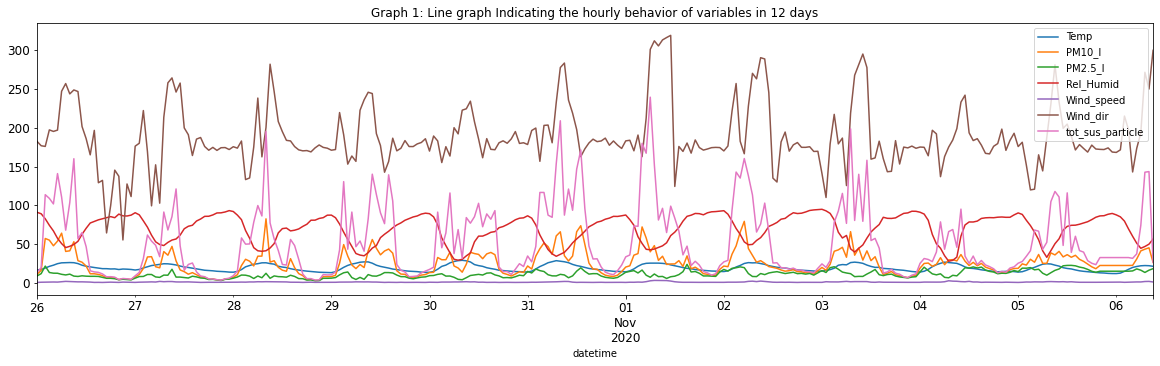

In [18]:
day = 12
#day = day-1
xy = is_rp2[0:day*24]
xy.plot(figsize=(20,5),title = 'Graph 1: Line graph Indicating the hourly behavior of variables in 12 days', fontsize= 12 );

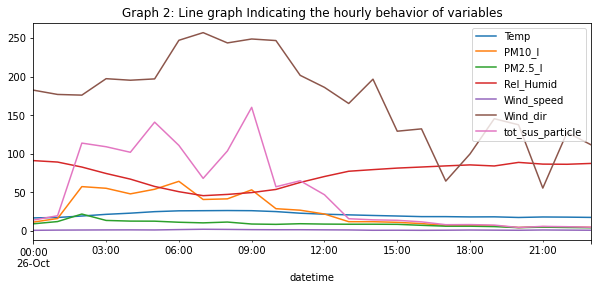

In [19]:
# %matplotlib inline

day = 1
day = day-1
xy = is_rp2[day*24:day*24+24]
xy.plot(figsize=(10,4),title = 'Graph 2: Line graph Indicating the hourly behavior of variables');

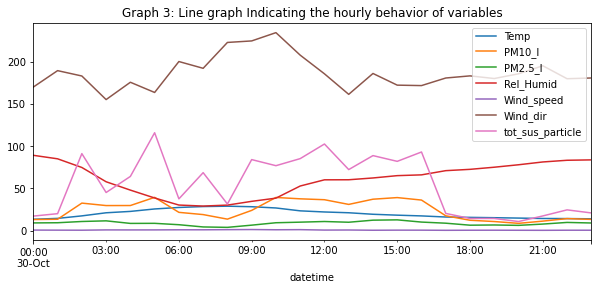

In [20]:
day = 5
day = day-1
xy = is_rp2[day*24:day*24+24]
xy.plot(figsize=(10,4),title = 'Graph 3: Line graph Indicating the hourly behavior of variables');

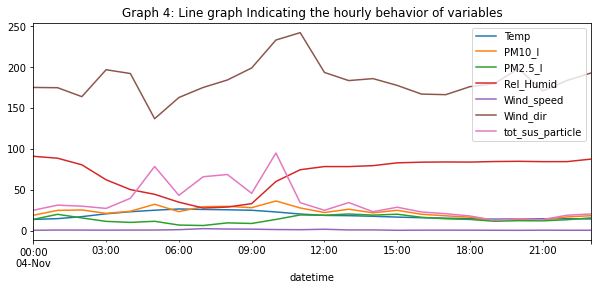

In [21]:
day = 10
day = day-1
xy = is_rp2[day*24:day*24+24]
xy.plot(figsize=(10,4),title = 'Graph 4: Line graph Indicating the hourly behavior of variables');

Above line graphs helps to understand and analyse the historical readings(values) of pollutant variables and weather variables against date time. 
Graph 1 shows hourly average reading of whloe time frame of 12 days on which reading were done. It shows almost similar pattern of rise and fall in each day throughout the 12 days period.
Graph 2, Graph 3 and Graph 4 shows the behaviour of variables in three random sample days - ie. 26th oct, 30th OCT and 4th Nov. 


### 3. Pairplot Analysis

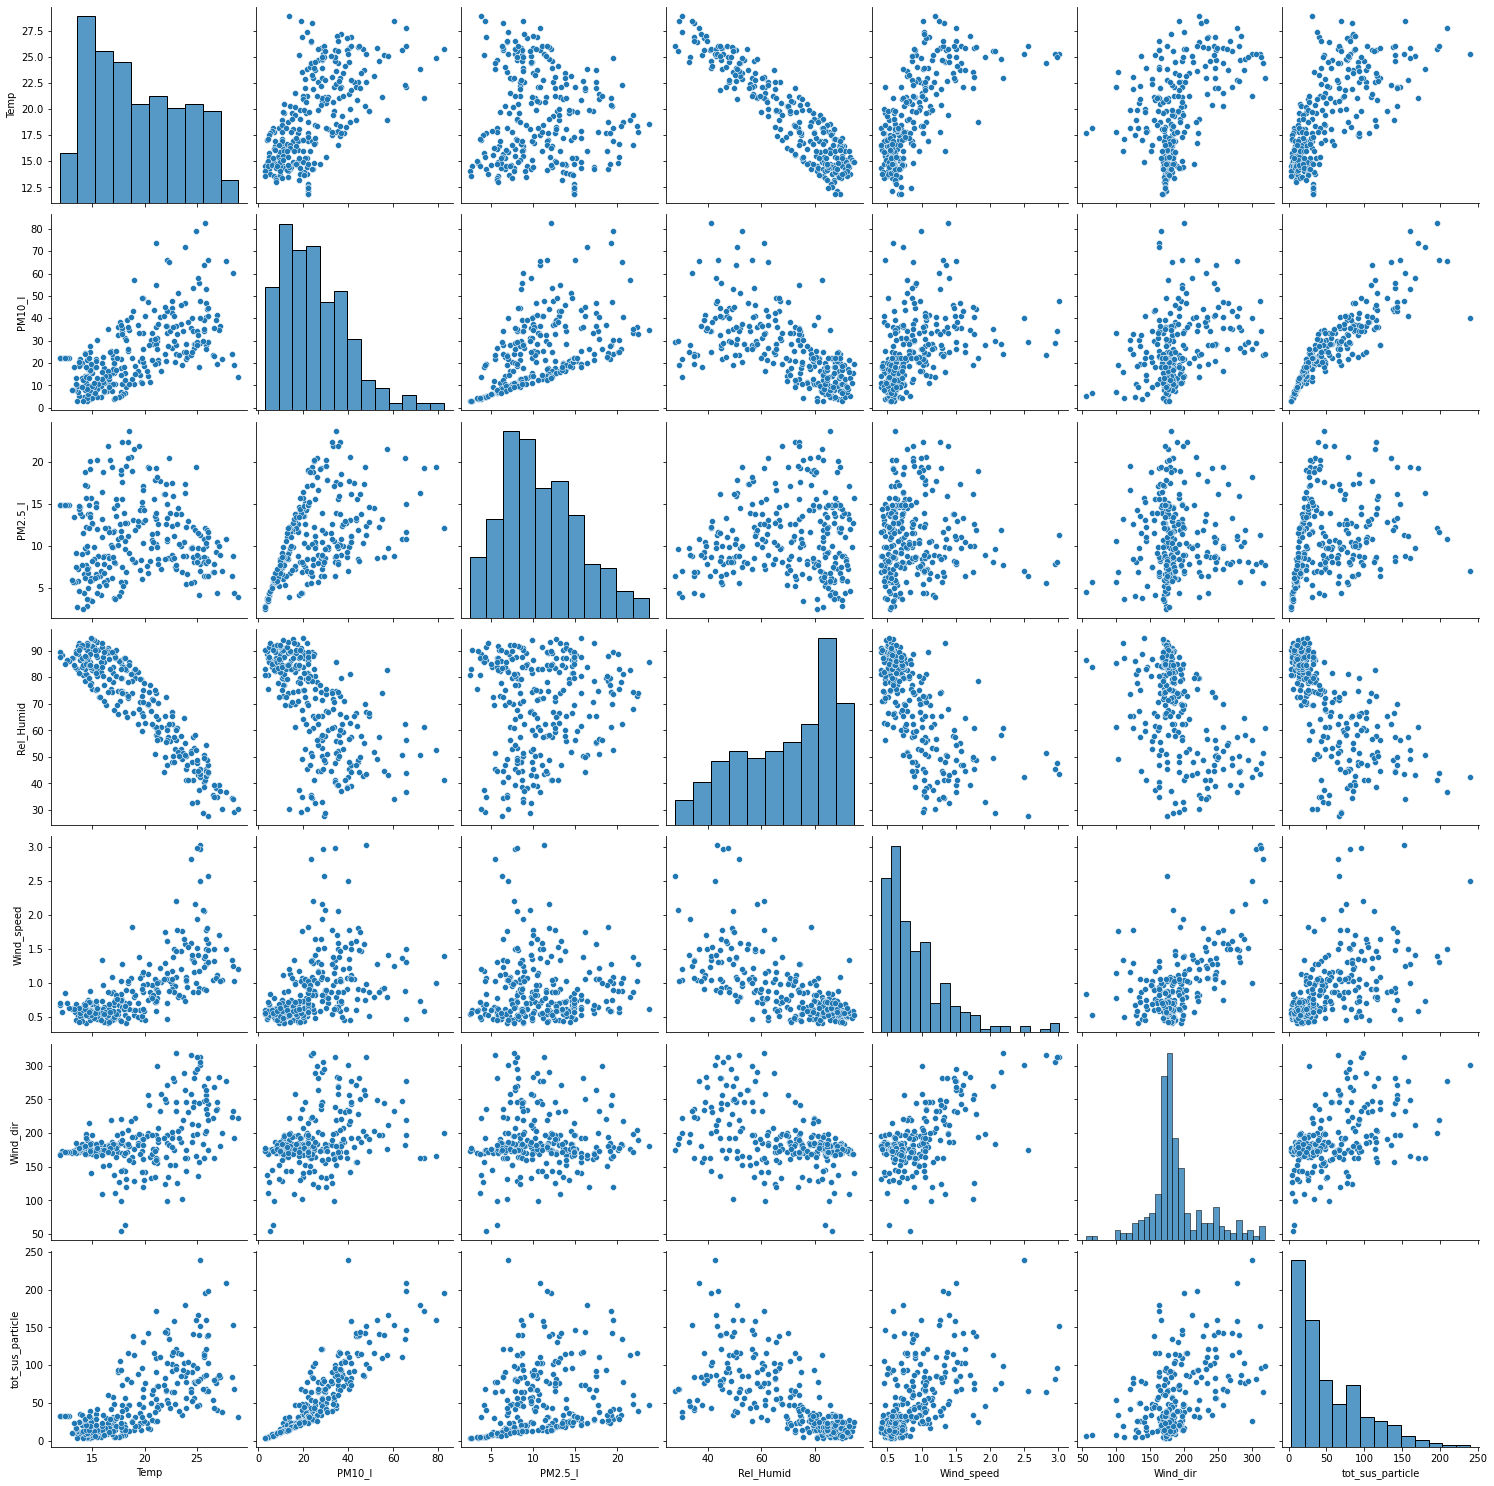

In [22]:
sns.pairplot(new_df, height=3.0)

The above pair plot displays the association between pollutants like PM2.5, PM10 and TSP with different environmental factors like temperature, relative humidity, wind speed and wind direction. It shows some significant association of PM10 with TSP, relative humidity and temperature. PM2.5 also seem to have some association to TSP but its association with other factors looks weaker. we can also figure out some association between PM2.5 and PM10 as well. 
TSP itself shows different level of association with wind speed, wind direction and tempearture.



### 4. Calculation of covariance matrix

[]

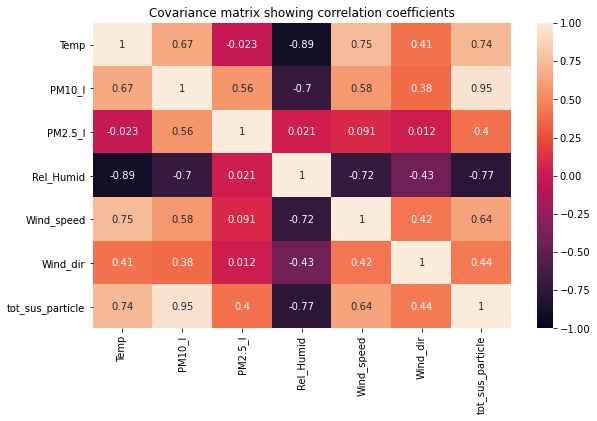

In [27]:

plt.figure(figsize=(8, 5))
plt.title('Covariance matrix showing correlation coefficients')
plt.tight_layout()
sns.heatmap(new_df.corr(method = 'spearman'), vmin=-1, vmax=1, annot=True)
plt.plot()

### 5. Observations and Insights

From the covariance matrix plot above based on Spearman's correlation ranking, we can see different level of correlations between environmental variables and weather variables. PM10 shows positive moderate correlation with each of wind speed and temperature while it inversely correlates with relative humidity. it means PM10 level might rises with rise in wind speed and wind turbulence level and vice versa while it's concentration might fall with rise in relative humidity level and vice versa. 

The PM2.5 doesn't show any significant correlation with any of the weather variables. On the other hand, TSP level shows an interesting correlation with all other variables with different degree of correlation coefficients.It shows positive moderate correlation with wind direction, wind speed and temperature while it is observed that relative humidity inversly correlates with TSP with moderate value of correlation coefficient.

The correlation of TSP with PM10 and PM2.5 is quite strong but that with PM2.5 is moderate. it can also be observed that PM10 moderately correlates with PM2.5. 

From above analysis it is observed that TSP - A Particulate matter which indicates the sum of all solid and liquid particles suspended in air that contributes to air polution, significantly correlates with weather variables - Temperature, Wind speed, Wind Direction, Relative Humidity and Pollutant variables - PM10 and PM2.5. So the level of TSP(Output Variable) can be Predicted using the model that Implement Linear Regression utlizing other variables as input variables. Prediction of PM10 can also be modeled in the same fashion.

But the case of PM2.5 is different. Although it shows moderate correlation with PM10 and TSP, its functional relationship with weather variables is not trival. So, it might require some complex approaches to predict the influence of weather variables on PM2.5 levels in the air.